# Procesamiento-Lenguaje-Natural-Client-Listener


## OS

In [85]:
import os # The OS module in Python provides a way of using operating system dependent functionality
import pandas as pd # Read data from file
import numpy

In [86]:
 # Reads and shows files in entered location
os.chdir("C:/Users/Alejandra/Desktop/Hackathon/data/")

## NLP y limpieza de datos


In [87]:
import re, string 
import pandas as pd 
import numpy as np
from time import time  
import re, itertools, random
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('spanish'))
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from scipy.spatial.distance import cdist
spacy.load('es_core_news_md')
nlp = spacy.load('es_core_news_md') # disabling Named Entity Recognition for speed

In [88]:
df1 = pd.read_excel("ING_es.xlsx",sheet_name="Archive", skipinitialspace = True) # Importing the database (tweets)
df2 = pd.read_excel("ING_es_scrapy.xlsx", skipinitialspace = True)

In [89]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df_clean1 = pd.DataFrame(df1.text.apply(lambda x: remove_emoji(x)))
df_clean1 = df_clean1.dropna()
df_clean1 = df_clean1.reset_index(drop=True)

df_clean2 = pd.DataFrame(df2.text.apply(lambda x: remove_emoji(x)))
df_clean2 = df_clean2.dropna()
df_clean2 = df_clean2.reset_index(drop=True)

In [90]:
c = np.concatenate([df_clean1, df_clean2], axis = 0)

In [91]:
df_clean =pd.DataFrame(c, columns=['text']) 
df_clean.head(106)

,text
0,"@ING_es Gracias por la información, hoy sigue ..."
1,@ING_es Muchas gracias!
2,@ING_es No hablo de las transferencias ordinar...
3,@ING_es hola! Quiero cancelar mis subscripcion...
4,@ING_es hola. Leéis los DM? Gracias
5,@ING_es Cuando yo pedí el mío si interesaba......
6,@ING_es el banco donde te envían un email pers...
7,@ING_es cuanto me cobra por hacer 5 transferen...
8,"@ING_es muy buenas, ¿me puede confirmar que se..."
9,"@ING_es Buenas , en la app no me sale bizum ac..."


In [92]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    if text is None:
        return ''
    text = str(text).replace("nan",'').lower()
    text = re.sub(r'\[.*?\]#"', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = re.sub(r'ʘ˧', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)
    
    # Remove a sentence if it is only one word long
    if len(text) >= 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean2 = pd.DataFrame(df_clean.text.apply(lambda x: clean_text(x)))
df_clean2 = df_clean2.dropna()
df_clean2 = df_clean2.reset_index(drop=True)

In [93]:
len(df_clean2)

328

In [94]:
df_clean2['text'].replace('', np.nan, inplace = True)
df_clean2.dropna(subset = ['text'], inplace = True)

In [95]:
len(df_clean2)

328

In [96]:
df_clean2['text'] = df_clean2['text'].str.replace("  ","") #Eliminar los espacios dobles.
df_clean2['text'] = df_clean2['text'].str.replace("?","")
df_clean2['text'] = df_clean2['text'].str.replace("¡","")
df_clean2['text'] = df_clean2['text'].str.replace("¿","")
df_clean2['text'] = df_clean2['text'].str.replace("¡","")
df_clean2['text'] = df_clean2['text'].str.replace("https","")
df_clean2['text'] = df_clean2['text'].str.replace('"','')

In [97]:
len(df_clean2)

328

In [98]:
def remove_letter(s):
    lista = s.split(" ")
    lista = [p for p in lista if len(p) != 1]
    final = " ".join(lista)
    return final

df_clean2["letter"] = df_clean2.apply(lambda x: remove_letter(x['text']), axis=1)

In [99]:
df_clean2.drop_duplicates(subset ="text", 
                     keep = False, inplace = True)

In [100]:
len(df_clean2)

320

In [101]:
#df_clean2['text'] = df_clean2['text'].map(lambda x: x.lstrip('').rstrip(''))

In [102]:
df_clean2.head(100)

,text,letter
0,ing gracias información hoy sigue llegarme car...,ing gracias información hoy sigue llegarme car...
2,ing hablo transferencias ordinarias transferen...,ing hablo transferencias ordinarias transferen...
3,ing hola quiero cancelar subscripciones automa...,ing hola quiero cancelar subscripciones automa...
4,ing hola leéis dm gracias,ing hola leéis dm gracias
5,ing pedí si interesaba ahora interés supera casi,ing pedí si interesaba ahora interés supera casi
6,ing banco envían email personal ofreciéndote s...,ing banco envían email personal ofreciéndote s...
7,ing cuanto cobra hacer transferencias oms cuan...,ing cuanto cobra hacer transferencias oms cuan...
8,ing buenas me puede confirmar puede operar órd...,ing buenas me puede confirmar puede operar órd...
9,ing buenas app sale bizum acabo actualizarla s...,ing buenas app sale bizum acabo actualizarla ios
10,ing imposible hablar cuenta hace años teléfono...,ing imposible hablar cuenta hace años teléfono...


In [103]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean2["text_lemmatize"] = df_clean2.apply(lambda x: lemmatizer(x['letter']), axis=1)

In [104]:
df_clean2.head(100)

,text,letter,text_lemmatize
0,ing gracias información hoy sigue llegarme car...,ing gracias información hoy sigue llegarme car...,ing gracia información hoy seguir llegarme car...
2,ing hablo transferencias ordinarias transferen...,ing hablo transferencias ordinarias transferen...,ing hablar transferencia ordinario transferenc...
3,ing hola quiero cancelar subscripciones automa...,ing hola quiero cancelar subscripciones automa...,ing hola querer cancelar subscripción automati...
4,ing hola leéis dm gracias,ing hola leéis dm gracias,ing hola leer decímetro gracia
5,ing pedí si interesaba ahora interés supera casi,ing pedí si interesaba ahora interés supera casi,ing pedir si interesar ahora interés superar casi
6,ing banco envían email personal ofreciéndote s...,ing banco envían email personal ofreciéndote s...,ing banco enviar email personal ofreciéndote s...
7,ing cuanto cobra hacer transferencias oms cuan...,ing cuanto cobra hacer transferencias oms cuan...,ing cuanto cobrar hacer transferencia oms cuan...
8,ing buenas me puede confirmar puede operar órd...,ing buenas me puede confirmar puede operar órd...,ing bueno me poder confirmar poder operar orde...
9,ing buenas app sale bizum acabo actualizarla s...,ing buenas app sale bizum acabo actualizarla ios,ing bueno app salir bizum acabar actualizarla ios
10,ing imposible hablar cuenta hace años teléfono...,ing imposible hablar cuenta hace años teléfono...,ing imposible hablar contar hacer año teléfono...


In [105]:
df_clean2['text_lemmatize_clean'] = df_clean2['text_lemmatize'].str.replace('-PRON-', '')

In [106]:
df_clean2.head()

,text,letter,text_lemmatize,text_lemmatize_clean
0,ing gracias información hoy sigue llegarme car...,ing gracias información hoy sigue llegarme car...,ing gracia información hoy seguir llegarme car...,ing gracia información hoy seguir llegarme car...
2,ing hablo transferencias ordinarias transferen...,ing hablo transferencias ordinarias transferen...,ing hablar transferencia ordinario transferenc...,ing hablar transferencia ordinario transferenc...
3,ing hola quiero cancelar subscripciones automa...,ing hola quiero cancelar subscripciones automa...,ing hola querer cancelar subscripción automati...,ing hola querer cancelar subscripción automati...
4,ing hola leéis dm gracias,ing hola leéis dm gracias,ing hola leer decímetro gracia,ing hola leer decímetro gracia
5,ing pedí si interesaba ahora interés supera casi,ing pedí si interesaba ahora interés supera casi,ing pedir si interesar ahora interés superar casi,ing pedir si interesar ahora interés superar casi


In [107]:
df_clean2.drop(['text', 'letter','text_lemmatize'], axis = 'columns', inplace=True)

In [108]:
data1 = df_clean2.rename(columns={"text_lemmatize_clean": "text"})

In [109]:
os.chdir("C:/Users/Alejandra/Desktop/Hackathon/Project/")

In [110]:
data1.to_excel('test.xlsx')

## Translate

In [111]:
#df = pd.read_excel("Modelo_SantanderMx.xlsx")

In [112]:
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/Alejandra/Desktop/Hackathon/Project/private.json"

In [113]:
"""
from google.cloud import translate_v2 as translate

def translate_text(text,target='en'):
    translate_client = translate.Client()
    result = translate_client.translate(text, target_language=target, format_= "text")
    
    return(result['translatedText'])
"""

'\nfrom google.cloud import translate_v2 as translate\n\ndef translate_text(text,target=\'en\'):\n    translate_client = translate.Client()\n    result = translate_client.translate(text, target_language=target, format_= "text")\n    \n    return(result[\'translatedText\'])\n'

In [114]:
#text = df['text'].tolist() 
#tweets = [text[i] for i in range(len(text))]
#tweets

In [115]:
"""
test_tweets = []

character_count = 0
translated_tweets = 0

for f in tweets:
    tweets_translated = translate_text(f, target = "en")
    test_tweets.append(tweets_translated)
    
    translated_tweets += 1
    character_count += len(f)
"""

'\ntest_tweets = []\n\ncharacter_count = 0\ntranslated_tweets = 0\n\nfor f in tweets:\n    tweets_translated = translate_text(f, target = "en")\n    test_tweets.append(tweets_translated)\n    \n    translated_tweets += 1\n    character_count += len(f)\n'

In [116]:
#test_tweets

In [117]:
#data = pd.DataFrame(test_tweets, columns=["text"])

In [118]:
#data.to_excel('SantanderMx.xlsx') #Bancolombia, Davivienda, BBVA_CO, Citibanamex,SantanderMx,BBVA_MX, Bankinter, ING, BBVA_ES

## Modelo de similud con Gensim Word2Vec

In [119]:
sentences = [row.split() for row in data1['text']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

1634

In [120]:
sentences

[['ing',
  'gracia',
  'información',
  'hoy',
  'seguir',
  'llegarme',
  'carta',
  'pedir',
  'favor',
  'revisar',
  'contar',
  'evitar',
  'movimiento',
  'sospechoso',
  'hacer',
  'importante',
  'trasferencia',
  'ing',
  'ninguno',
  'noticiar',
  'rogar',
  'mandar',
  'posible'],
 ['ing', 'hablar', 'transferencia', 'ordinario', 'transferencia', 'oms'],
 ['ing',
  'hola',
  'querer',
  'cancelar',
  'subscripción',
  'automaticas',
  'fondo',
  'inversion',
  'poder',
  'hacerlo'],
 ['ing', 'hola', 'leer', 'decímetro', 'gracia'],
 ['ing', 'pedir', 'si', 'interesar', 'ahora', 'interés', 'superar', 'casi'],
 ['ing',
  'banco',
  'enviar',
  'email',
  'personal',
  'ofreciéndote',
  'solicitar',
  'tárjeta',
  'crédito',
  'solicitar',
  'enviar',
  'vez',
  'poder',
  'activarla',
  'decir',
  'derecho',
  'bienvenido',
  'banco',
  'banco'],
 ['ing',
  'cuanto',
  'cobrar',
  'hacer',
  'transferencia',
  'oms',
  'cuanto',
  'hacer',
  'cheque'],
 ['ing',
  'bueno',
  'me',

In [121]:
word_freq.keys()

dict_keys(['ing', 'gracia', 'información', 'hoy', 'seguir', 'llegarme', 'carta', 'pedir', 'favor', 'revisar', 'contar', 'evitar', 'movimiento', 'sospechoso', 'hacer', 'importante', 'trasferencia', 'ninguno', 'noticiar', 'rogar', 'mandar', 'posible', 'hablar', 'transferencia', 'ordinario', 'oms', 'hola', 'querer', 'cancelar', 'subscripción', 'automaticas', 'fondo', 'inversion', 'poder', 'hacerlo', 'leer', 'decímetro', 'si', 'interesar', 'ahora', 'interés', 'superar', 'casi', 'banco', 'enviar', 'email', 'personal', 'ofreciéndote', 'solicitar', 'tárjeta', 'crédito', 'vez', 'activarla', 'decir', 'derecho', 'bienvenido', 'cuanto', 'cobrar', 'cheque', 'bueno', 'me', 'confirmar', 'operar', 'orden', 'condicionar', 'comprar', 'venta', 'valorar', 'internacional', 'aplicación', 'móvil', 'app', 'salir', 'bizum', 'acabar', 'actualizarla', 'ios', 'imposible', 'año', 'teléfono', 'siempre', 'pidiéndome', 'uno', 'clave', 'ameno', 'orange', 'tres', 'preguntar', 'dormir', 'respuesta', 'whatsapp', 'poner'

In [122]:
frecuencias = pd.DataFrame(word_freq.keys(), columns=["palabras"])

In [123]:
frecuencias['freq'] = word_freq.values()

In [124]:
frecuencias.head()

,palabras,freq
0,ing,356
1,gracia,30
2,información,10
3,hoy,15
4,seguir,17


In [125]:
word_freq

defaultdict(int,
            {'ing': 356,
             'gracia': 30,
             'información': 10,
             'hoy': 15,
             'seguir': 17,
             'llegarme': 1,
             'carta': 2,
             'pedir': 47,
             'favor': 5,
             'revisar': 3,
             'contar': 100,
             'evitar': 3,
             'movimiento': 2,
             'sospechoso': 1,
             'hacer': 106,
             'importante': 4,
             'trasferencia': 2,
             'ninguno': 26,
             'noticiar': 2,
             'rogar': 1,
             'mandar': 15,
             'posible': 7,
             'hablar': 15,
             'transferencia': 19,
             'ordinario': 3,
             'oms': 2,
             'hola': 21,
             'querer': 16,
             'cancelar': 10,
             'subscripción': 1,
             'automaticas': 1,
             'fondo': 9,
             'inversion': 1,
             'poder': 82,
             'hacerlo': 2,
             'l

In [126]:
frecuencias.to_excel('frecuencias_ING.xlsx')

In [32]:
sorted(word_freq, key=word_freq.get, reverse=True)[:20]

['santandermx',
 'poder',
 'hacer',
 'sucursal',
 'servicio',
 'contar',
 'llamar',
 'co',
 'decir',
 'tarjeta',
 'banco',
 'dinero',
 'cliente',
 'santander',
 'malo',
 'ir',
 'vosotros',
 'cajero',
 'dar',
 'si']

In [35]:
# min_count: minimum number of occurrences of a word in the corpus to be included in the model.
# window: the maximum distance between the current and predicted word within a sentence.
# size: the dimensionality of the feature vectors
# workers: I know kaggle system is having 4 cores without gpu and 2 with gpu, 
w2v_model = Word2Vec(min_count=10,
                     window=3,
                     size=200,
                     workers=4)

In [36]:
w2v_model.build_vocab(sentences)

In [37]:
# train word vectors
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)

C:\Users\Alejandra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(12810, 41350)

In [38]:
len(w2v_model.wv.vocab)

161

In [76]:
w2v_model.wv.vocab

{'santandermx': <gensim.models.keyedvectors.Vocab at 0x1fea722ed08>,
 'servicio': <gensim.models.keyedvectors.Vocab at 0x1fea722e788>,
 'cliente': <gensim.models.keyedvectors.Vocab at 0x1fea722e288>,
 'alguno': <gensim.models.keyedvectors.Vocab at 0x1fea722eac8>,
 'problema': <gensim.models.keyedvectors.Vocab at 0x1fea722e2c8>,
 'tarjeta': <gensim.models.keyedvectors.Vocab at 0x1fea722e548>,
 'personar': <gensim.models.keyedvectors.Vocab at 0x1fea722ebc8>,
 'pasar': <gensim.models.keyedvectors.Vocab at 0x1fea722e648>,
 'santander': <gensim.models.keyedvectors.Vocab at 0x1fea722e308>,
 'robar': <gensim.models.keyedvectors.Vocab at 0x1fea722e988>,
 'vosotros': <gensim.models.keyedvectors.Vocab at 0x1fea722e808>,
 'mismo': <gensim.models.keyedvectors.Vocab at 0x1fea722e708>,
 'dinero': <gensim.models.keyedvectors.Vocab at 0x1fea722ed88>,
 'mil': <gensim.models.keyedvectors.Vocab at 0x1fea722e748>,
 'peso': <gensim.models.keyedvectors.Vocab at 0x1fea722ed48>,
 'contar': <gensim.models.keye

In [39]:
#print(w2v_model.wv.vocab)

In [40]:
# As we do not plan to train the model any further, 
# we are calling init_sims(), which will make the model much more memory-efficient
w2v_model.init_sims(replace=True)

In [41]:
'banco' in w2v_model.wv.vocab

True

In [118]:
#w2v_model.wv.most_similar(positive=['banco','bbva','esperar'])

In [43]:
w2v_model.wv.similarity('banco','crédito')

0.9915731

In [44]:
w2v_model.wv.doesnt_match(['banco','bancolombia','reclamar', 'ver'])

C:\Users\Alejandra\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'banco'

In [45]:
def tsne_plot(model, perplexity=10, n_iter=1000):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    i = 0
    for word in sorted(model.wv.vocab.keys(), reverse=True):
        tokens.append(model[word])
        labels.append(word)
        i+=1
        if i >= 499:
            break
        
    tsne_model = TSNE(n_components=2, init='pca', random_state=0, perplexity=perplexity, n_iter=n_iter)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    x_min, x_max = np.min(new_values, 0), np.max(new_values, 0)
    X = (new_values - x_min) / (x_max - x_min)
    shown_images = np.array([[1., 1.]])  # just something big
    
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        '''if np.min(dist) < 1e-3:
            # don't show points that are too close
            continue'''
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(3, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [46]:
#tsne_plot(w2v_model,40,5000)

In [47]:
# First get the embeddings into a matrix
embedding_size=200
embeddings = np.zeros((len(w2v_model.wv.index2word), embedding_size))
for i in range(0, len(w2v_model.wv.index2word)):
    w = w2v_model.wv.index2word[i]
    embeddings[i] = w2v_model.wv[w]

In [48]:
svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=500, random_state=101)
embeddings_2d_projection = svd.fit_transform(embeddings)

In [59]:
n_clusters = 2
embedding_cluster_model = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)

In [60]:
centroid_embedding_nearest_words = []
for centroid_embedding in embedding_cluster_model.cluster_centers_:
    centroid_embedding_nearest_words.append(
        np.argsort([i[0] for i in cdist(embeddings, np.array([centroid_embedding]), "euclidean")])[0:10]
    )

In [73]:
centroid_embedding_nearest_words

[array([ 0,  2,  9,  6,  1, 18,  3, 14,  4,  8], dtype=int64),
 array([ 0,  9,  3, 14,  2,  6, 18,  8, 54, 23], dtype=int64)]

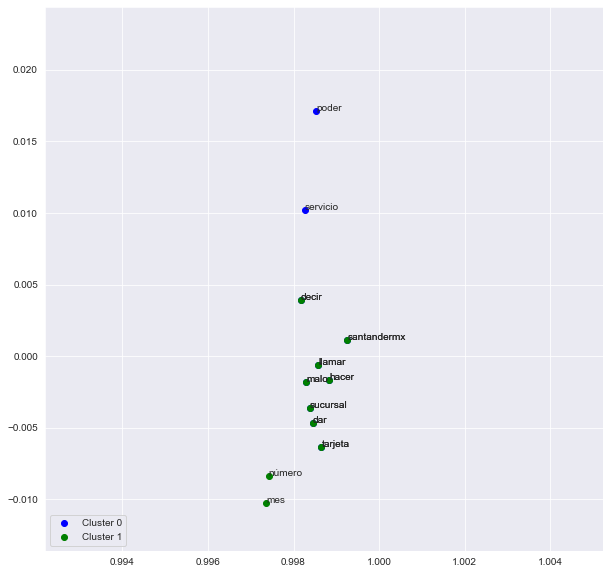

In [61]:
plt.figure(figsize=(10,10))
colors = itertools.cycle(["b","g","r","c","m","y","k","w"])
c = 0
for word_indices in centroid_embedding_nearest_words:
    clr = next(colors)
    plt.scatter(
        embeddings_2d_projection[word_indices,0],
        embeddings_2d_projection[word_indices,1],
        color=clr,
        label="Cluster " + str(c)
    )
    for ix in word_indices:
        x, y = embeddings_2d_projection[ix,:]
        plt.annotate(w2v_model.wv.index2word[ix], (x, y))
    c+=1
plt.legend(loc='lower left')
plt.show()

In [77]:
for word_indices in centroid_embedding_nearest_words:
    x = embeddings_2d_projection[word_indices,0]
    y = embeddings_2d_projection[word_indices,1]
print(x)
print(y)

[0.99925819 0.99864896 0.99838045 0.99829886 0.99883205 0.9985821
 0.99844828 0.99816394 0.99735778 0.99742094]
[ 0.00111294 -0.00635819 -0.00361559 -0.00177666 -0.00167668 -0.00058902
 -0.0046776   0.00388748 -0.01029463 -0.00837861]


In [80]:
w2v_model.wv.index2word[1]

'poder'

In [52]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 200), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 200 to 12 dimensions with PCA
    reduc = PCA(n_components=12).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                         'words': word_labels,
                        'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [53]:
#tsnescatterplot(w2v_model, 'bbva', sorted(word_freq, key=word_freq.get, reverse=True)[:10])

In [54]:
#tsnescatterplot(w2v_model, 'bbva', ['crédito','tarjeta'])

In [117]:
#tsnescatterplot(w2v_model, 'bbva', [i[0] for i in w2v_model.wv.most_similar(negative=['bbva'])])

In [56]:
w2v_model

In [116]:
#w2v_model.wv.most_similar(negative=['bbva'])

In [58]:
type(w2v_model)

gensim.models.word2vec.Word2Vec